## Installing Mediapipe

In [ ]:
%%capture
pip install mediapipe

## Importing the Libraries

In [ ]:
import numpy as np
import os, cv2, math, glob, random
import scipy.io as sio
from math import cos, sin
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
import mediapipe as mp
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

## Unzip the Images' Dataset

In [ ]:
%%capture
if os.path.isdir('/content/AFLW2000-3D.zip') == False:
  !unzip /content/AFLW2000-3D.zip

## Data Extraction and Normalization

In [ ]:
# Create a folder path
folder_path = r'/content/AFLW2000'

# Loop through all files in the folder
points = {}
yaw = []
pitch = []
roll = []
nose = {}

for filename in sorted(os.listdir(folder_path)):
    if filename.lower().endswith(( 'mat','.jpg')):
        if filename.lower().endswith(( '.jpg')):
            faceModule = mediapipe.solutions.face_mesh
            with faceModule.FaceMesh(static_image_mode=True) as faces:

                # Loading the image
                image_path = fr'/content/AFLW2000/{filename}'
                image = cv2.imread(image_path)
                results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                # Processing the face to extract the landmark points (468 points) for each x, y, z
                points[filename] = []
                nose[filename] = []
                if results.multi_face_landmarks is not None:
                    nose[filename].append(results.multi_face_landmarks[0].landmark[4])

                    distance = np.sqrt((results.multi_face_landmarks[0].landmark[4].x-results.multi_face_landmarks[0].landmark[152].x)**2+(results.multi_face_landmarks[0].landmark[4].y-results.multi_face_landmarks[0].landmark[152].y)**2)
                    # Looping over the faces in the image
                    for face in results.multi_face_landmarks:
                        for landmark in face.landmark:

                            x = (landmark.x - face.landmark[4].x) / distance
                            y = (landmark.y - face.landmark[4].y) / distance
                            points[filename].append(x)
                            points[filename].append(y)


        if filename.lower().endswith(( '.mat')):
            mat = sio.loadmat(fr'/content/AFLW2000/{filename}')
            pose_para = mat["Pose_Para"][0][:3]
            pitch.append(pose_para[0])
            yaw.append(pose_para[1])
            roll.append(pose_para[2])

# Creating a dataframe
df = pd.DataFrame.from_dict(points, orient='index')

df["Roll"] = roll
df["Pitch"] = pitch
df["Yaw"] = yaw


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,Roll,Pitch,Yaw
image00002.jpg,-0.023766,0.318033,-0.006607,0.089623,-0.003661,0.126111,-0.052436,-0.284171,0.0,0.0,...,-0.621764,0.246334,-0.585163,0.847951,-0.725764,0.898419,-0.761263,0.085676,-0.399231,0.018227
image00004.jpg,0.135390,0.342489,0.007973,0.080386,0.173977,0.176596,0.106425,-0.167740,0.0,0.0,...,-0.343096,0.446485,-0.326326,0.887145,-0.403468,0.937679,-0.429012,0.300959,0.470065,1.189533
image00006.jpg,-0.034451,0.295173,-0.001236,0.081678,-0.029573,0.134064,-0.097803,-0.205510,0.0,0.0,...,-0.441704,0.067555,-0.418426,0.488717,-0.515062,0.528595,-0.545855,-0.236852,-0.184650,0.881137
image00008.jpg,0.206938,0.278244,0.038110,0.079997,0.136178,0.103737,-0.085015,-0.232270,0.0,0.0,...,-0.623308,0.141488,-0.583820,0.656938,-0.893207,0.691559,-0.947129,-0.373374,-0.175379,0.299208
image00010.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.033374,-0.882169,1.198004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image04358.jpg,-0.056898,0.364123,-0.013462,0.097607,-0.029582,0.156435,-0.064382,-0.279807,0.0,0.0,...,-0.582368,0.225926,-0.553400,0.822239,-0.653323,0.873485,-0.689914,0.105118,-0.197102,-0.070430
image04363.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175960,-0.232617,-1.418751
image04364.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.509418,-1.447955,1.431267
image04365.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.451515,-0.420465,-1.191176


In [ ]:
df.dropna(inplace = True)

In [ ]:
labels = df.loc[:, df.columns.isin(['Yaw', 'Pitch', 'Roll'])]
labels

,Roll,Pitch,Yaw
image00002.jpg,0.085676,-0.399231,0.018227
image00004.jpg,0.300959,0.470065,1.189533
image00006.jpg,-0.236852,-0.184650,0.881137
image00008.jpg,-0.373374,-0.175379,0.299208
image00013.jpg,-0.220662,-0.026812,0.011965
...,...,...,...
image04345.jpg,0.038554,-0.306358,-0.283822
image04348.jpg,0.122791,-0.367547,-0.429723
image04356.jpg,-0.108536,-0.156035,0.567114
image04358.jpg,0.105118,-0.197102,-0.070430


In [ ]:
features = df.drop(columns=['Yaw', 'Pitch', 'Roll'])
features

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
image00002.jpg,-0.023766,0.318033,-0.006607,0.089623,-0.003661,0.126111,-0.052436,-0.284171,0.0,0.0,...,0.334869,-0.658936,0.280270,-0.621764,0.246334,-0.585163,0.847951,-0.725764,0.898419,-0.761263
image00004.jpg,0.135390,0.342489,0.007973,0.080386,0.173977,0.176596,0.106425,-0.167740,0.0,0.0,...,0.561180,-0.368172,0.502940,-0.343096,0.446485,-0.326326,0.887145,-0.403468,0.937679,-0.429012
image00006.jpg,-0.034451,0.295173,-0.001236,0.081678,-0.029573,0.134064,-0.097803,-0.205510,0.0,0.0,...,0.121871,-0.470623,0.083497,-0.441704,0.067555,-0.418426,0.488717,-0.515062,0.528595,-0.545855
image00008.jpg,0.206938,0.278244,0.038110,0.079997,0.136178,0.103737,-0.085015,-0.232270,0.0,0.0,...,0.224828,-0.670657,0.176554,-0.623308,0.141488,-0.583820,0.656938,-0.893207,0.691559,-0.947129
image00013.jpg,0.088346,0.338087,0.018155,0.080560,0.046324,0.159416,-0.083512,-0.169726,0.0,0.0,...,0.129485,-0.412059,0.090370,-0.385039,0.070019,-0.368888,0.458136,-0.529165,0.493518,-0.545693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image04345.jpg,-0.099509,0.382300,-0.012532,0.091444,-0.082647,0.161951,-0.118476,-0.237458,0.0,0.0,...,0.069188,-0.551927,0.032662,-0.521384,0.023654,-0.495524,0.468628,-0.638928,0.502156,-0.664404
image04348.jpg,-0.114418,0.343310,-0.014925,0.089406,-0.089373,0.143153,-0.106608,-0.248062,0.0,0.0,...,0.063322,-0.572256,0.034897,-0.538985,0.030157,-0.510105,0.424913,-0.634097,0.461928,-0.675651
image04356.jpg,-0.100844,0.302607,-0.022521,0.075017,-0.068619,0.153835,-0.028862,-0.183603,0.0,0.0,...,0.235679,-0.317604,0.193756,-0.308145,0.170728,-0.299684,0.540394,-0.272573,0.580638,-0.305275
image04358.jpg,-0.056898,0.364123,-0.013462,0.097607,-0.029582,0.156435,-0.064382,-0.279807,0.0,0.0,...,0.324614,-0.612608,0.261693,-0.582368,0.225926,-0.553400,0.822239,-0.653323,0.873485,-0.689914


### Saving data into csv files

In [ ]:
features.to_csv("features.csv", index=False)
labels.to_csv("labels.csv", index=False)

## Spliting the Data
80% training, 10% validation, 10% test

In [ ]:
# To split the data into train, validation, test.
from sklearn.model_selection import train_test_split

# Used random state = 100 to make sure we always get the same results.
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features, labels, test_size = 0.2, train_size = 0.8, random_state = 100)

features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size = 0.5, train_size = 0.5, random_state = 100)

## Training different models on the dataset
here we trained 4 models:


*   Linear Regression

*   Support Vector Regressor
*   Random Forest Regressor


*   XGBoost Regressor




### Implementation

## 1. Linear Regression
### a. Predicting roll angle

In [ ]:
# Models used to predict the 3 labels.
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# The metrics that will be used, to see how good the model is..
from sklearn.metrics import mean_squared_error, mean_absolute_error

# To help in tuning the parameters of the models.
from sklearn.model_selection import GridSearchCV

# To save the final model.
import joblib

In [ ]:
# Create LinearRegression model and fit it on the train data.
roll_reg = LinearRegression()
roll_reg.fit(features_train, labels_train["Roll"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
reg_roll_train_predicted = roll_reg.predict(features_train)
reg_roll_val_predicted = roll_reg.predict(features_validation)
reg_roll_test_predicted = roll_reg.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Roll"], reg_roll_train_predicted))
print(mean_absolute_error(labels_train["Roll"], reg_roll_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Roll"], reg_roll_val_predicted))
print(mean_absolute_error(labels_validation["Roll"], reg_roll_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Roll"], reg_roll_test_predicted))
print(mean_absolute_error(labels_test["Roll"], reg_roll_test_predicted))

Training scores: 
0.0066157404032333375
0.0637515454209417

Validation scores: 
0.08831775043760064
0.20423080778201666

Test scores: 
0.2137205699730182
0.25390652063174046


### b. Predicting pitch angle

In [ ]:
# Create LinearRegression model and fit it on the train data.
yaw_reg = LinearRegression()
yaw_reg.fit(features_train, labels_train["Yaw"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
reg_yaw_train_predicted = yaw_reg.predict(features_train)
reg_yaw_val_predicted = yaw_reg.predict(features_validation)
reg_yaw_test_predicted = yaw_reg.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Yaw"], reg_yaw_train_predicted))
print(mean_absolute_error(labels_train["Yaw"], reg_yaw_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Yaw"], reg_yaw_val_predicted))
print(mean_absolute_error(labels_validation["Yaw"], reg_yaw_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Yaw"], reg_yaw_test_predicted))
print(mean_absolute_error(labels_test["Yaw"], reg_yaw_test_predicted))

Training scores: 
0.004852991170126514
0.05218406273409393

Validation scores: 
0.05931937212014835
0.17565067153001307

Test scores: 
0.20455291715416626
0.18938679675417122


### c. Predicting yaw angle

In [ ]:
# Create LinearRegression model and fit it on the train data.
pitch_reg = LinearRegression()
pitch_reg.fit(features_train, labels_train["Pitch"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
reg_pitch_train_predicted = pitch_reg.predict(features_train)
reg_pitch_val_predicted = pitch_reg.predict(features_validation)
reg_pitch_test_predicted = pitch_reg.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Pitch"], reg_pitch_train_predicted))
print(mean_absolute_error(labels_train["Pitch"], reg_pitch_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Pitch"], reg_pitch_val_predicted))
print(mean_absolute_error(labels_validation["Pitch"], reg_pitch_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Pitch"], reg_pitch_test_predicted))
print(mean_absolute_error(labels_test["Pitch"], reg_pitch_test_predicted))

Training scores: 
0.010471166365147014
0.0814998684041114

Validation scores: 
0.1856974120164598
0.302130021285696

Test scores: 
0.24156647682989
0.27620468218523264


> From the big difference between the training scores, validation & test scores, we find that linear regression is overfitting.

## 2. SVR
### a. Predicting roll angle

In [ ]:
# Create LinearRegression model and fit it on the train data.
roll_svr = SVR()
roll_svr.fit(features_train, labels_train["Roll"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
svr_roll_train_predicted = roll_svr.predict(features_train)
svr_roll_val_predicted = roll_svr.predict(features_validation)
svr_roll_test_predicted = roll_svr.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Roll"], svr_roll_train_predicted))
print(mean_absolute_error(labels_train["Roll"], svr_roll_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Roll"], svr_roll_val_predicted))
print(mean_absolute_error(labels_validation["Roll"], svr_roll_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Roll"], svr_roll_test_predicted))
print(mean_absolute_error(labels_test["Roll"], svr_roll_test_predicted))

Training scores: 
0.34857956167783277
0.07940934760649765

Validation scores: 
0.016882458776741008
0.06059305320680566

Test scores: 
0.09402158828117611
0.08799678906183576


### b. Predicting pitch angle

In [ ]:
pitch_svr = SVR()
pitch_svr.fit(features_train, labels_train["Pitch"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
svr_pitch_train_predicted = pitch_svr.predict(features_train)
svr_pitch_val_predicted = pitch_svr.predict(features_validation)
svr_pitch_test_predicted = pitch_svr.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Pitch"], svr_pitch_train_predicted))
print(mean_absolute_error(labels_train["Pitch"], svr_pitch_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Pitch"], svr_pitch_val_predicted))
print(mean_absolute_error(labels_validation["Pitch"], svr_pitch_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Pitch"], svr_pitch_test_predicted))
print(mean_absolute_error(labels_test["Pitch"], svr_pitch_test_predicted))

Training scores: 
0.29461432177188335
0.10304351529586371

Validation scores: 
0.021977079749316213
0.0885101735918541

Test scores: 
0.04965996141023508
0.10140708451671354


### c. Predicting yaw angle

In [ ]:
yaw_svr = SVR()
yaw_svr.fit(features_train, labels_train["Yaw"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
svr_yaw_train_predicted = yaw_svr.predict(features_train)
svr_yaw_val_predicted = yaw_svr.predict(features_validation)
svr_yaw_test_predicted = yaw_svr.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Yaw"], svr_yaw_train_predicted))
print(mean_absolute_error(labels_train["Yaw"], svr_yaw_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Yaw"], svr_yaw_val_predicted))
print(mean_absolute_error(labels_validation["Yaw"], svr_yaw_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Yaw"], svr_yaw_test_predicted))
print(mean_absolute_error(labels_test["Yaw"], svr_yaw_test_predicted))

Training scores: 
0.048040594834749706
0.07453981915171579

Validation scores: 
0.010331327728442153
0.06116070961358523

Test scores: 
0.028497699559892717
0.07050413344951305


## 3. Random Forest
### a. Predicting roll angle

In [ ]:
roll_rf = RandomForestRegressor()
roll_rf.fit(features_train, labels_train["Roll"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
rf_roll_train_predicted = roll_rf.predict(features_train)
rf_roll_val_predicted = roll_rf.predict(features_validation)
rf_roll_test_predicted = roll_rf.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Roll"], rf_roll_train_predicted))
print(mean_absolute_error(labels_train["Roll"], rf_roll_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Roll"], rf_roll_val_predicted))
print(mean_absolute_error(labels_validation["Roll"], rf_roll_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Roll"], rf_roll_test_predicted))
print(mean_absolute_error(labels_test["Roll"], rf_roll_test_predicted))

Training scores: 
0.058323301491684715
0.0402993828223412

Validation scores: 
0.0174204897498238
0.05684787505800204

Test scores: 
0.4874978095557403
0.13092670749337945


### b. Predicting pitch angle

In [ ]:
pitch_rf = RandomForestRegressor()
pitch_rf.fit(features_train, labels_train["Pitch"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
rf_pitch_train_predicted = pitch_rf.predict(features_train)
rf_pitch_val_predicted = pitch_rf.predict(features_validation)
rf_pitch_test_predicted = pitch_rf.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Pitch"], rf_pitch_train_predicted))
print(mean_absolute_error(labels_train["Pitch"], rf_pitch_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Pitch"], rf_pitch_val_predicted))
print(mean_absolute_error(labels_validation["Pitch"], rf_pitch_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Pitch"], rf_pitch_test_predicted))
print(mean_absolute_error(labels_test["Pitch"], rf_pitch_test_predicted))

Training scores: 
0.0699877891546517
0.049314010662756695

Validation scores: 
0.029784054719480427
0.10221062226146396

Test scores: 
0.06810733355877001
0.11625921904207123


### c. Predicting yaw angle

In [ ]:
yaw_rf = RandomForestRegressor()
yaw_rf.fit(features_train, labels_train["Yaw"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
rf_yaw_train_predicted = yaw_rf.predict(features_train)
rf_yaw_val_predicted = yaw_rf.predict(features_validation)
rf_yaw_test_predicted = yaw_rf.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Yaw"], rf_yaw_train_predicted))
print(mean_absolute_error(labels_train["Yaw"], rf_yaw_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Yaw"], rf_yaw_val_predicted))
print(mean_absolute_error(labels_validation["Yaw"], rf_yaw_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Yaw"], rf_yaw_test_predicted))
print(mean_absolute_error(labels_test["Yaw"], rf_yaw_test_predicted))

Training scores: 
0.009315518431144556
0.032272353070817855

Validation scores: 
0.011602011812286307
0.0672591159797865

Test scores: 
0.032999189008681366
0.08054223660894842


## 4. XGBoost
### a. Predicting roll angle

In [ ]:
roll_xgb = xgb.XGBRegressor()
roll_xgb.fit(features_train, labels_train["Roll"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
xgb_roll_train_predicted = roll_xgb.predict(features_train)
xgb_roll_val_predicted = roll_xgb.predict(features_validation)
xgb_roll_test_predicted = roll_xgb.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Roll"], xgb_roll_train_predicted))
print(mean_absolute_error(labels_train["Roll"], xgb_roll_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Roll"], xgb_roll_val_predicted))
print(mean_absolute_error(labels_validation["Roll"], xgb_roll_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Roll"], xgb_roll_test_predicted))
print(mean_absolute_error(labels_test["Roll"], xgb_roll_test_predicted))

Training scores: 
5.195637316207064e-06
0.001663349635559758

Validation scores: 
0.017581820842458212
0.06357385142166734

Test scores: 
1.6178976445573403
0.21224452305509767


### b. Predicting pitch angle

In [ ]:
pitch_xgb = xgb.XGBRegressor()
pitch_xgb.fit(features_train, labels_train["Pitch"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
xgb_pitch_train_predicted = pitch_xgb.predict(features_train)
xgb_pitch_val_predicted = pitch_xgb.predict(features_validation)
xgb_pitch_test_predicted = pitch_xgb.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Pitch"], xgb_pitch_train_predicted))
print(mean_absolute_error(labels_train["Pitch"], xgb_pitch_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Pitch"], xgb_pitch_val_predicted))
print(mean_absolute_error(labels_validation["Pitch"], xgb_pitch_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Pitch"], xgb_pitch_test_predicted))
print(mean_absolute_error(labels_test["Pitch"], xgb_pitch_test_predicted))

Training scores: 
2.3225657679925784e-05
0.003448407096795671

Validation scores: 
0.02747328370638544
0.10243857346689077

Test scores: 
0.1716561938574424
0.1468862756220374


### c. Predicting yaw angle

In [ ]:
yaw_xgb = xgb.XGBRegressor()
yaw_xgb.fit(features_train, labels_train["Yaw"])

# Use the trained model to predict the labels of the train data, validation data, and test data.
xgb_yaw_train_predicted = yaw_xgb.predict(features_train)
xgb_yaw_val_predicted = yaw_xgb.predict(features_validation)
xgb_yaw_test_predicted = yaw_xgb.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Yaw"], xgb_yaw_train_predicted))
print(mean_absolute_error(labels_train["Yaw"], xgb_yaw_train_predicted))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Yaw"], xgb_yaw_val_predicted))
print(mean_absolute_error(labels_validation["Yaw"], xgb_yaw_val_predicted))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Yaw"], xgb_yaw_test_predicted))
print(mean_absolute_error(labels_test["Yaw"], xgb_yaw_test_predicted))

Training scores: 
7.77032545804684e-06
0.002026405257356539

Validation scores: 
0.017553010890848205
0.07984503699291373

Test scores: 
0.07845926985123478
0.1077823468116784


## Finding the best model using GridSearchCV

In [ ]:
def grid_search(model, parameters, features_train, labels_train):
    model_gs = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 10)
    model_gs.fit(features_train, labels_train)
    best_model = model_gs.best_estimator_
    print(f"Best model is {best_model}")
    return best_model

## Choosing SVR Model and Tuning the Hyperparameters (Roll, Pitch, Yaw)

In [ ]:
svr_parameters = {
                        'C': [0.01, 0.1, 1, 10, 100],
                        'epsilon': np.arange(0.01, 0.1, 0.01)
}
roll_svr = SVR()
roll_svr_best_model = grid_search(roll_svr, svr_parameters, features_train, labels_train["Roll"])

Best model is SVR(C=100, epsilon=0.09)


In [ ]:
# Tuning Roll SVR model
# Use the trained model to predict the labels of the train data, validation data, and test data
svr_best_roll_train_predict = roll_svr_best_model.predict(features_train)
svr_best_roll_valid_predict = roll_svr_best_model.predict(features_validation)
svr_best_roll_test_predict = roll_svr_best_model.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Roll"], svr_best_roll_train_predict))
print(mean_absolute_error(labels_train["Roll"], svr_best_roll_train_predict))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Roll"], svr_best_roll_valid_predict))
print(mean_absolute_error(labels_validation["Roll"], svr_best_roll_valid_predict))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Roll"], svr_best_roll_test_predict))
print(mean_absolute_error(labels_test["Roll"], svr_best_roll_test_predict))


Training scores: 
0.22830946521605228
0.0713568304381402

Validation scores: 
0.013897600899807244
0.0637868367818225

Test scores: 
0.10833272924992708
0.09719466224542116


In [ ]:
yaw_svr = SVR()
yaw_svr_best_model = grid_search(yaw_svr, svr_parameters, features_train, labels_train["Yaw"])

Best model is SVR(C=10, epsilon=0.01)


In [ ]:
# Tuning Yaw SVR model
# Use the trained model to predict the labels of the train data, validation data, and test data
svr_best_yaw_train_predict = yaw_svr_best_model.predict(features_train)
svr_best_yaw_val_predict = yaw_svr_best_model.predict(features_validation)
svr_best_yaw_test_predict = yaw_svr_best_model.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Yaw"], svr_best_yaw_train_predict))
print(mean_absolute_error(labels_train["Yaw"],svr_best_yaw_train_predict))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Yaw"], svr_best_yaw_val_predict))
print(mean_absolute_error(labels_validation["Yaw"], svr_best_yaw_val_predict))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Yaw"], svr_best_yaw_test_predict))
print(mean_absolute_error(labels_test["Yaw"], svr_best_yaw_test_predict))


Training scores: 
0.04423892822011894
0.06410091848565976

Validation scores: 
0.009582271019756046
0.0581057245083314

Test scores: 
0.02679549190792571
0.06514813549297245


In [ ]:
pitch_svr = SVR()
pitch_svr_best_model = grid_search(pitch_svr, svr_parameters, features_train, labels_train["Pitch"])

Best model is SVR(C=1, epsilon=0.01)


In [ ]:
# Use the trained model to predict the labels of the train data, validation data, and test data
svr_best_pitch_train_predict = pitch_svr_best_model.predict(features_train)
svr_best_pitch_val_predict = pitch_svr_best_model.predict(features_validation)
svr_best_pitch_test_predict = pitch_svr_best_model.predict(features_test)

# Print the Mean square error and the absolute error on the training.
print("Training scores: ")
print(mean_squared_error(labels_train["Pitch"], svr_best_pitch_train_predict))
print(mean_absolute_error(labels_train["Pitch"],svr_best_pitch_train_predict))

# Print the Mean square error and the absolute error on the validation.
print("\nValidation scores: ")
print(mean_squared_error(labels_validation["Pitch"], svr_best_pitch_val_predict))
print(mean_absolute_error(labels_validation["Pitch"], svr_best_pitch_val_predict))

# Print the Mean square error and the absolute error on the test.
print("\nTest scores: ")
print(mean_squared_error(labels_test["Pitch"], svr_best_pitch_test_predict))
print(mean_absolute_error(labels_test["Pitch"], svr_best_pitch_test_predict))

Training scores: 
0.29533219022491264
0.10047213688012534

Validation scores: 
0.022385759132996015
0.08735294155893754

Test scores: 
0.04958784206448748
0.10081695269883488


In [74]:
def draw_axis(img, pitch, yaw, roll, tdx = None, tdy = None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(255,0,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(0,0,255),2)

    return img

Testing the SVR Model on an Image

In [77]:
def extract_landmarks(image):

    # Loop through all files in the folder
    points = {}
    nose = {}
    faceModule = mediapipe.solutions.face_mesh
    with faceModule.FaceMesh(static_image_mode=True) as faces:

        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Processing the face to extract the landmark points (468 points) for each x, y, z
        points = []
        nose = {}
        if results.multi_face_landmarks is not None:
            nose['x'] = results.multi_face_landmarks[0].landmark[4].x
            nose['y'] = results.multi_face_landmarks[0].landmark[4].y

            distance = np.sqrt((results.multi_face_landmarks[0].landmark[4].x - results.multi_face_landmarks[0].landmark[152].x)**2 +
                               (results.multi_face_landmarks[0].landmark[4].y - results.multi_face_landmarks[0].landmark[152].y)**2)
            # Looping over the faces in the image
            for face in results.multi_face_landmarks:
                for landmark in face.landmark:
                    x = (landmark.x - face.landmark[4].x) / distance
                    y = (landmark.y - face.landmark[4].y) / distance
                    points.append(x)
                    points.append(y)

    return np.array(points).reshape(1, -1), nose


[-0.21790599]
[0.63892059]
[-0.19372208]


(-0.5, 1919.5, 1079.5, -0.5)

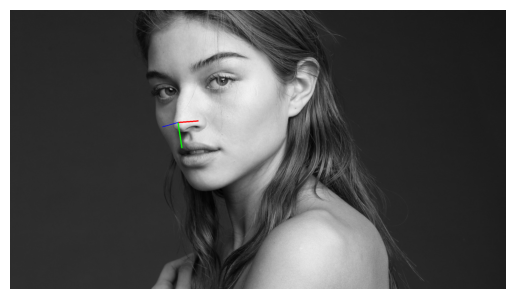

In [78]:
image = cv2.imread('image1.jpg')
points, nose = extract_landmarks(image)

pitch = pitch_svr_best_model.predict(points)
yaw = yaw_svr_best_model.predict(points)
roll = roll_svr_best_model.predict(points)

print(pitch)
print(yaw)
print(roll)

plt.imshow(draw_axis(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), pitch, yaw, roll, tdx = nose['x'] * image.shape[1], tdy = nose['y'] * image.shape[0], size = 100))
plt.axis('off')

[-0.12888561]
[0.26224169]
[-0.09249183]


(-0.5, 3424.5, 2884.5, -0.5)

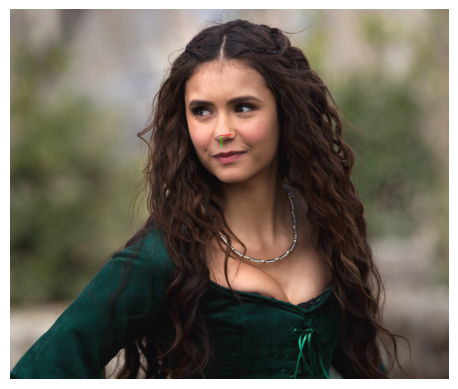

In [79]:
im2 = cv2.imread('image2.jpg')
points, nose = extract_landmarks(im2)

pitch = pitch_svr_best_model.predict(points)
yaw = yaw_svr_best_model.predict(points)
roll = roll_svr_best_model.predict(points)

print(pitch)
print(yaw)
print(roll)
plt.imshow(draw_axis(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB), pitch, yaw, roll, tdx = nose['x'] * im2.shape[1], tdy = nose['y'] * im2.shape[0], size = 100))
plt.axis('off')


[-0.26616611]
[-0.12434886]
[0.2705629]


(-0.5, 1919.5, 1199.5, -0.5)

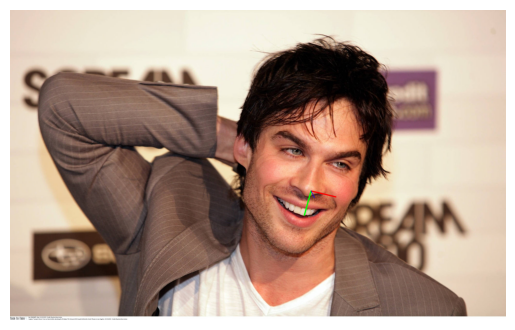

In [80]:
im3 = cv2.imread('image3.jpg')
points, nose = extract_landmarks(im3)

pitch = pitch_svr_best_model.predict(points)
yaw = yaw_svr_best_model.predict(points)
roll = roll_svr_best_model.predict(points)

print(pitch)
print(yaw)
print(roll)
plt.imshow(draw_axis(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB), pitch, yaw, roll, tdx = nose['x'] * im3.shape[1], tdy = nose['y'] * im3.shape[0], size = 100))
plt.axis('off')

[-0.21210673]
[0.61908075]
[-0.27067825]


(-0.5, 611.5, 407.5, -0.5)

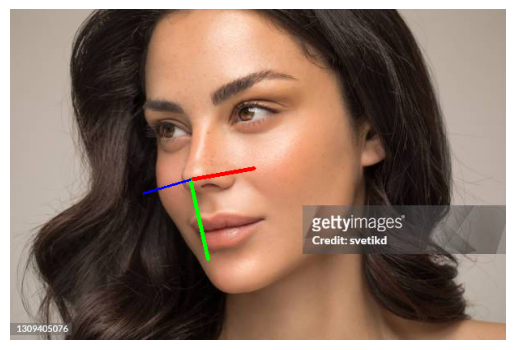

In [81]:
im4 = cv2.imread('image4.jpg')
points, nose = extract_landmarks(im4)

pitch = pitch_svr_best_model.predict(points)
yaw = yaw_svr_best_model.predict(points)
roll = roll_svr_best_model.predict(points)

print(pitch)
print(yaw)
print(roll)
plt.imshow(draw_axis(cv2.cvtColor(im4, cv2.COLOR_BGR2RGB), pitch, yaw, roll, tdx = nose['x'] * im4.shape[1], tdy = nose['y'] * im4.shape[0], size = 100))
plt.axis('off')


[0.1689117]
[0.74768867]
[-0.02792809]


(-0.5, 801.5, 792.5, -0.5)

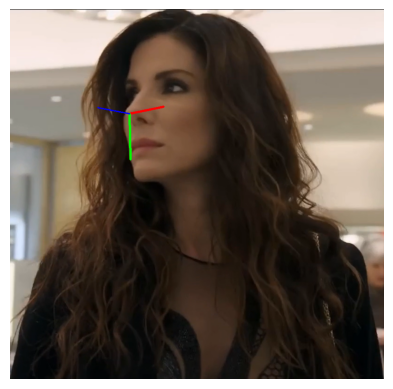

In [82]:
im5 = cv2.imread('image5.png')
points, nose = extract_landmarks(im5)

pitch = pitch_svr_best_model.predict(points)
yaw = yaw_svr_best_model.predict(points)
roll = roll_svr_best_model.predict(points)

print(pitch)
print(yaw)
print(roll)
plt.imshow(draw_axis(cv2.cvtColor(im5, cv2.COLOR_BGR2RGB), pitch, yaw, roll, tdx = nose['x'] * im5.shape[1], tdy = nose['y'] * im5.shape[0], size = 100))
plt.axis('off')


## Testing the SVR Model on a Video

In [83]:
# Load the face detection module
faceModule = mp.solutions.face_mesh

# Load the video
video_path = r'/content/Oceans _8.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer to write output video
fourcc = cv2.VideoWriter_fourcc(*'AVC1')
out = cv2.VideoWriter('prediction_video.mp4', fourcc, fps, (width, height))

# Loop through each frame in the video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB (as required by MediaPipe)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform face detection and landmark estimation on the frame
    with faceModule.FaceMesh(static_image_mode=False) as faces:
        results = faces.process(frame_rgb)
        if results.multi_face_landmarks:
            # Iterate over each detected face
            for face_idx, face_landmarks in enumerate(results.multi_face_landmarks):
                # Initialize variables to store face-specific data
                face_nodes = []
                nose_landmark = face_landmarks.landmark[4]
                chin_landmark = face_landmarks.landmark[152]
                face_shape = np.sqrt((nose_landmark.x - chin_landmark.x) ** 2 + (nose_landmark.y - chin_landmark.y) ** 2)

                # Extract normalized face landmarks
                for landmark in face_landmarks.landmark:
                    x = (landmark.x - nose_landmark.x) / face_shape
                    y = (landmark.y - nose_landmark.y) / face_shape
                    face_nodes.extend([x, y])

                face_nodes = np.array(face_nodes).reshape(1, -1)

                # Predict head pose using SVR models for the current face
                pitch = pitch_svr_best_model.predict(face_nodes)
                yaw = yaw_svr_best_model.predict(face_nodes)
                roll = roll_svr_best_model.predict(face_nodes)

                # Draw axis on the frame for the current face
                frame_with_axis = draw_axis(frame.copy(), pitch, yaw, roll, tdx=nose_landmark.x * frame.shape[1], tdy=nose_landmark.y * frame.shape[0])

                # Write the frame with axis to the output video
                out.write(frame_with_axis)

# Release video capture and video writer objects
cap.release()
out.release()
cv2.destroyAllWindows()
